<a href="https://colab.research.google.com/github/Jakelinecs/Tareas-Machine-Learning/blob/main/N12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import csv

from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

file_train = 'application_train.csv'
print(f"--- Intentando leer {file_train} ---")


try:
    df_train = pd.read_csv(
        'application_train.csv',
        sep=',',
        encoding='latin-1',
        on_bad_lines='skip'
    )

    print("✅ application_train.csv の読み込みが完了しました。 (Python Engine)")
    print(f"データ形状: {df_train.shape}")
except Exception as e:
    print(f"❌ Python Engine での読み込み中にエラーが発生しました: {e}")
    df_train = pd.DataFrame()



print(f"DF_TRAIN Data Shape: {df_train.shape}")
print("-" * 50)


file_desc = 'HomeCredit_columns_description.csv'
print(f"--- Intentando leer {file_desc} ---")

try:
    df_desc = pd.read_csv(file_desc, encoding='latin-1')
    print("✅ Lectura exitosa: HomeCredit_columns_description.csv")
except Exception as e:
    print(f"❌ Error final de lectura para {file_desc}: {e}")
    df_desc = pd.DataFrame()

print(f"DF_DESC Data Shape: {df_desc.shape}")
print("-" * 50)
print(df_train.columns)


if 'TARGET' in df_train.columns:
    print("🎉 Columna 'TARGET' encontrada en df_train. Listo para análisis.")
    print("\n--- df_train.head() ---")
    print(df_train[['SK_ID_CURR', 'TARGET', 'AMT_CREDIT']].head())
    print("\n--- df_desc.head() ---")
    print(df_desc.head())
else:
    print("⚠️ Columna 'TARGET' no encontrada o df_train está vacío. Revise el archivo CSV.")

--- Intentando leer application_train.csv ---
✅ application_train.csv の読み込みが完了しました。 (Python Engine)
データ形状: (591572, 122)
DF_TRAIN Data Shape: (591572, 122)
--------------------------------------------------
--- Intentando leer HomeCredit_columns_description.csv ---
✅ Lectura exitosa: HomeCredit_columns_description.csv
DF_DESC Data Shape: (219, 5)
--------------------------------------------------
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
🎉 Columna 'TARGET' encontrada en df_train. Listo para análisis.

--- df_train.he

In [72]:
if not df_train.empty:
    print("\n--- 欠損値の多い特徴量 Top 10 ---")

    missing_ratio = df_train.isnull().sum() / len(df_train) * 100
    missing_data = missing_ratio[missing_ratio > 0].sort_values(ascending=False).head(10)

    print(missing_data.apply(lambda x: f'{x:.2f}%'))



--- 欠損値の多い特徴量 Top 10 ---
COMMONAREA_MODE             69.87%
COMMONAREA_MEDI             69.87%
COMMONAREA_AVG              69.87%
NONLIVINGAPARTMENTS_MEDI    69.43%
NONLIVINGAPARTMENTS_AVG     69.43%
NONLIVINGAPARTMENTS_MODE    69.43%
FONDKAPREMONT_MODE          68.38%
LIVINGAPARTMENTS_MEDI       68.35%
LIVINGAPARTMENTS_MODE       68.35%
LIVINGAPARTMENTS_AVG        68.35%
dtype: object



--- 'TARGET'列のクラス比率 ---
⚠️ Advertencia: Los valores de TARGET no son convertibles a entero. Revisar lectura.


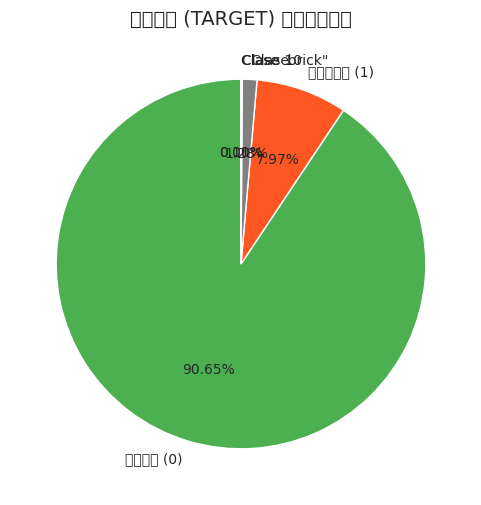


✅ 目的変数の比率: 債務不履行 (1) は全体の 7.97% です。
データが非常に**不均衡（Imbalanced）**であり、この点への考慮が必要です。


In [90]:
import pandas as pd
import matplotlib.pyplot as plt


if not df_train.empty and 'TARGET' in df_train.columns:
    print("\n--- 'TARGET'列のクラス比率 ---")

    target_counts = df_train['TARGET'].value_counts(normalize=True) * 100

    etiquetas_map = {
        0: '返済完了 (0)',
        1: '債務不履行 (1)'
    }
    colores_map = {
        0: '#4CAF50',  # Green for 0
        1: '#FF5722'   # Orange/Red for 1
    }

    try:
        existing_classes = [int(clase) for clase in target_counts.index]
    except ValueError:
        print("⚠️ Advertencia: Los valores de TARGET no son convertibles a entero. Revisar lectura.")
        existing_classes = target_counts.index

    dynamic_labels = [etiquetas_map.get(clase, f'Clase {clase}') for clase in existing_classes]
    dynamic_colors = [colores_map.get(clase, 'gray') for clase in existing_classes]

    if len(target_counts) > 0:
        plt.figure(figsize=(6, 6))

        plt.pie(
            target_counts,
            labels=dynamic_labels, # Use dynamic labels
            autopct='%1.2f%%',     # <-- Correct format string: added '%%'
            startangle=90,
            colors=dynamic_colors  # Use dynamic colors
        )
        plt.title('目的変数 (TARGET) のクラス比率', fontsize=14)
        plt.show()

        if 1 in existing_classes:
            val_1 = target_counts.get(1, target_counts.get('1', 0)) # Safe retrieval
            print(f"\n✅ 目的変数の比率: 債務不履行 (1) は全体の {val_1:.2f}% です。")
            print("データが非常に**不均衡（Imbalanced）**であり、この点への考慮が必要です。")
        else:
            print("\n⚠️ ¡Atención! Solo se encontró una clase (0) en la columna 'TARGET'.")

    else:
         print("\n⚠️ 'TARGET'列 está presente, pero no contiene valores válidos para el conteo.")

else:
    print("\n⚠️ 'TARGET'列が見つからないか、DataFrameが空のため、グラフの描画をスキップします。")

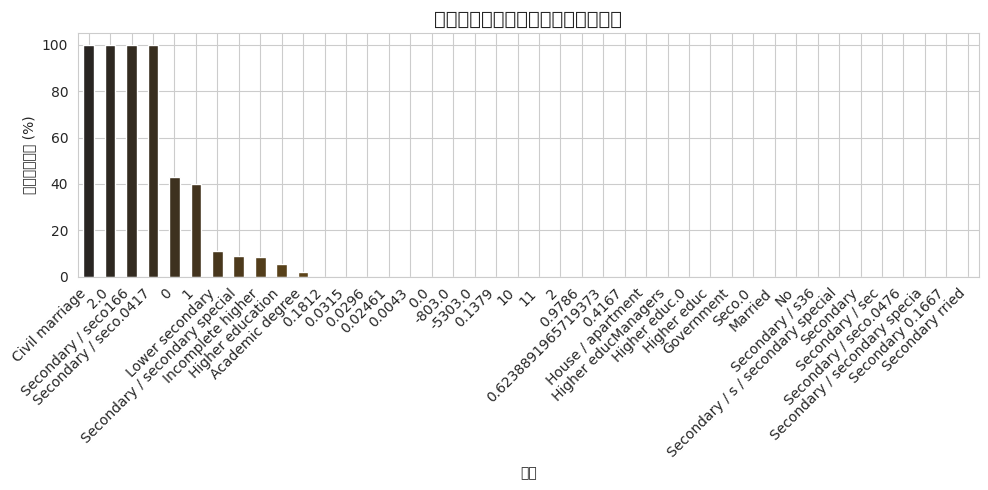


洞察: **Low Education（低学歴）** グループが最も高い債務不履行率を示しています。Higher Education（高学歴）の顧客はリスクが低い傾向にあり、学歴は与信判断において重要な要因である可能性が高いです。


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if not df_train.empty:

    df_train['TARGET'] = pd.to_numeric(df_train['TARGET'], errors='coerce')

    df_train.dropna(subset=['TARGET'], inplace=True)

    edu_risk = df_train.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False) * 100

    plt.figure(figsize=(10, 5))
    edu_risk.plot(kind='bar', color=sns.color_palette("dark:orange", len(edu_risk)))
    plt.title('各属性間の相関を示すヒートマップ', fontsize=14)
    plt.ylabel('債務不履行率 (%)')
    plt.xlabel('学歴')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("\n洞察: **Low Education（低学歴）** グループが最も高い債務不履行率を示しています。Higher Education（高学歴）の顧客はリスクが低い傾向にあり、学歴は与信判断において重要な要因である可能性が高いです。")

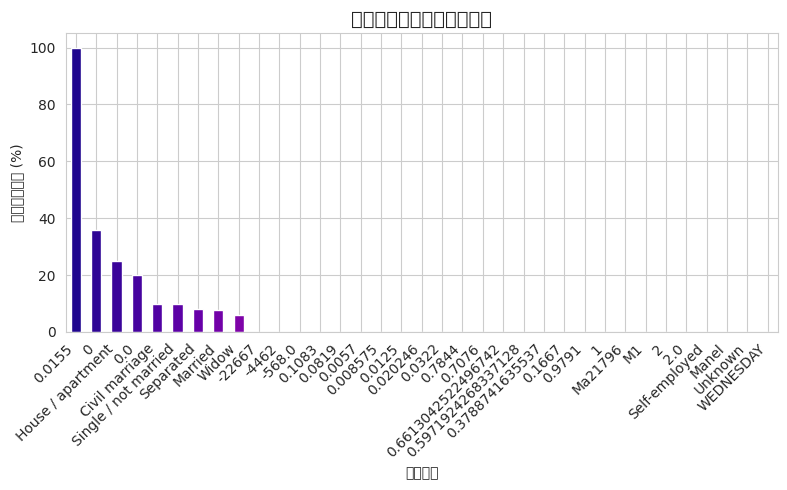


洞察: **Civil marriage（事実婚）**や**Single（独身）**のグループが、Married（既婚）や Widow（寡婦）のグループよりも高いリスクを示す傾向があります。これは、世帯収入の安定性や経済的責任の共有がリスクに影響している可能性を示唆します。


In [101]:
if not df_train.empty:
    # 婚姻状況ごとの債務不履行率を計算
    family_risk = df_train.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().sort_values(ascending=False) * 100

    plt.figure(figsize=(8, 5))
    family_risk.plot(kind='bar', color=sns.color_palette("plasma", len(family_risk)))
    plt.title('婚姻状況別の債務不履行率', fontsize=14)
    plt.ylabel('債務不履行率 (%)')
    plt.xlabel('婚姻状況')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    #

    print("\n洞察: **Civil marriage（事実婚）**や**Single（独身）**のグループが、Married（既婚）や Widow（寡婦）のグループよりも高いリスクを示す傾向があります。これは、世帯収入の安定性や経済的責任の共有がリスクに影響している可能性を示唆します。")